Insurance Charges Prediction
========================
Dataset : Medical Costs Personal Datasets <br>
[Link](https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial/data)

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load Dataset
data = pd.read_csv(r"./datasets/data.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Check null values and datatypes
print(f"Null values in Dataset : {np.any(data.isna().sum())}")
print("----------------------------------------------------------------------------------------")
data.info()

Null values in Dataset : False
----------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## EDA

<AxesSubplot:>

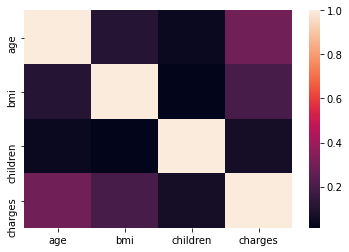

In [4]:
sns.heatmap(data.corr())

age and bmi seems to have some correlation between them and charges

#### Smoker Impact on Charges

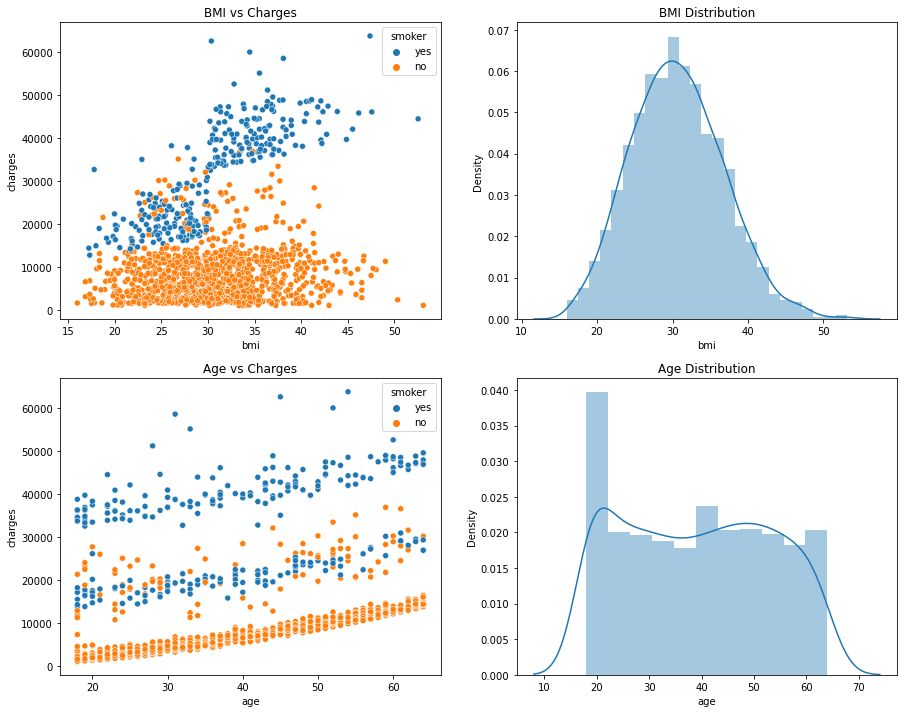

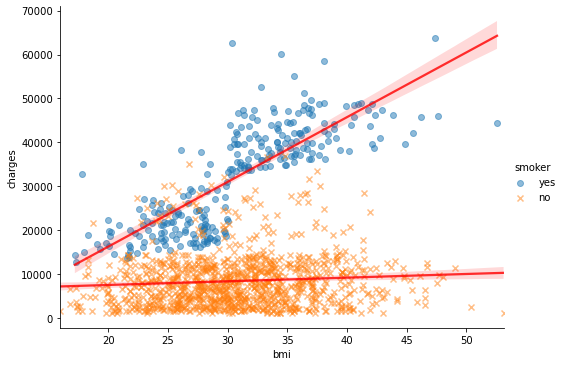

In [5]:
fig, ax = plt.subplots(2,2, figsize=(15,12))

plt.subplot(2,2,1)
plt.title("BMI vs Charges")
sns.scatterplot(x="bmi", y="charges", data=data, hue="smoker")

plt.subplot(2,2,2)
plt.title("BMI Distribution")
sns.distplot(data.bmi)

plt.subplot(2,2,3)
plt.title("Age vs Charges")
sns.scatterplot(x="age", y="charges", data=data, hue="smoker")

plt.subplot(2,2,4)
plt.title("Age Distribution")
sns.distplot(data.age)


sns.lmplot(x="bmi", y="charges", data=data, hue="smoker", markers=['o','x'], line_kws={'color':'red', 'alpha':0.8}, scatter_kws={'alpha':0.5}, aspect=1.4)

From above graphs, we can say that smokers are charged higher than non smokers and distributions are Normal and Uniform for BMI and age respectively

#### Gender impact on charges

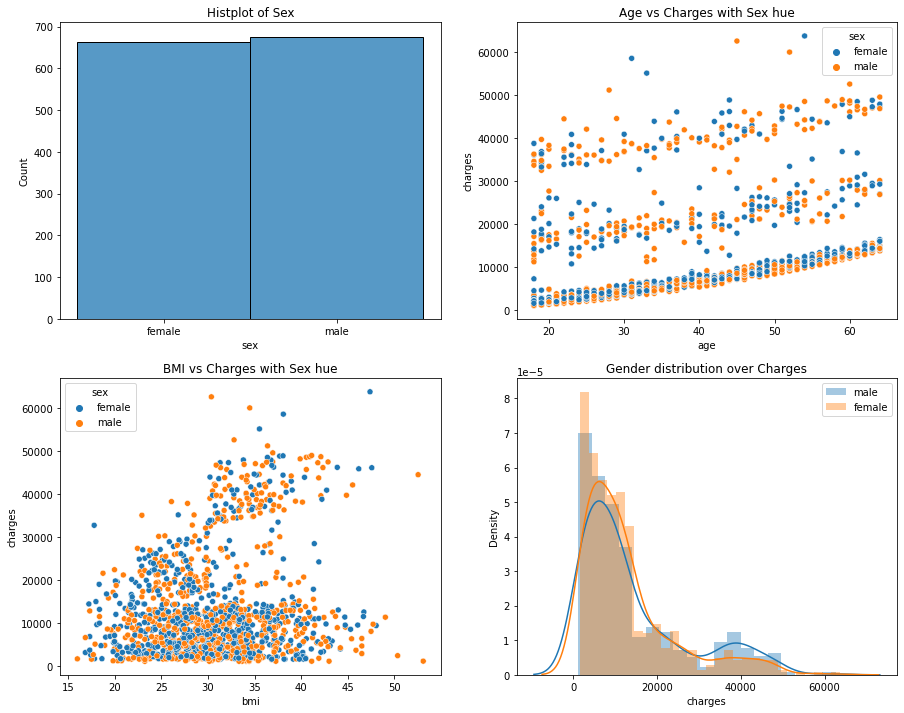

In [6]:
fig, ax = plt.subplots(2,2, figsize=(15,12))
plt.subplot(2,2,1)
plt.title("Histplot of Sex")
sns.histplot(data=data, x="sex")

plt.subplot(2,2,2)
plt.title("Age vs Charges with Sex hue")
sns.scatterplot(x="age", y="charges", data=data, hue="sex")

plt.subplot(2,2,3)
plt.title("BMI vs Charges with Sex hue")
sns.scatterplot(x="bmi", y="charges", data=data, hue="sex")

plt.subplot(2,2,4)
plt.title("Gender distribution over Charges")
sns.distplot(data[data.sex=="male"].charges, label="male")
sns.distplot(data[data.sex!="male"].charges, label="female")
plt.legend()

No relation to charge and sex

#### Region Impact on charges

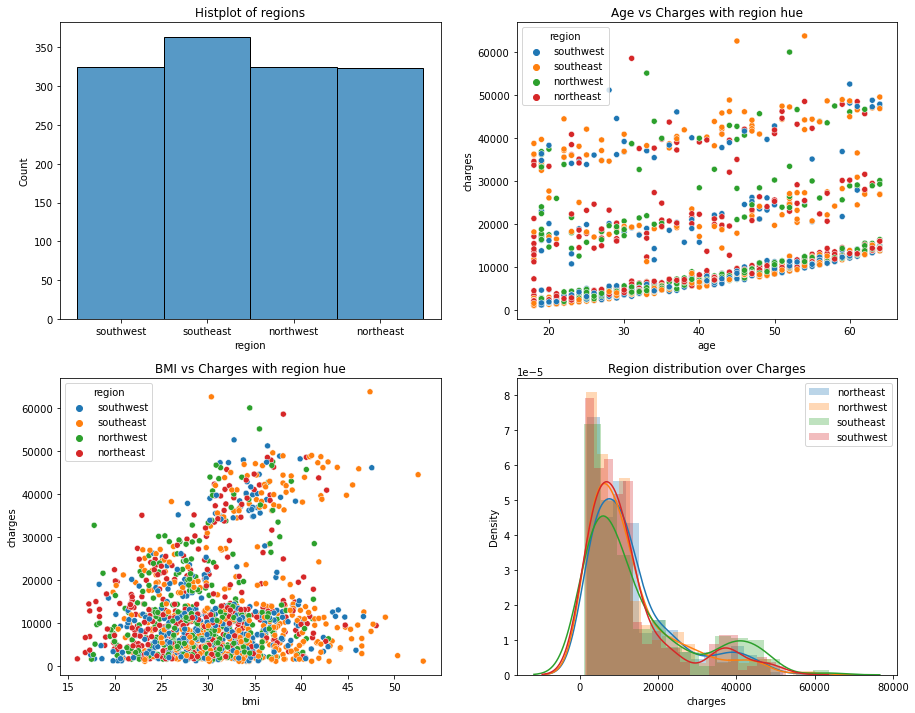

In [7]:
plt.subplots(2,2, figsize=(15,12))

plt.subplot(2,2,1)
plt.title("Histplot of regions")
sns.histplot(x="region", data=data)

plt.subplot(2,2,2)
plt.title("Age vs Charges with region hue")
sns.scatterplot(x="age", y="charges", data=data, hue="region")

plt.subplot(2,2,3)
plt.title("BMI vs Charges with region hue")
sns.scatterplot(x="bmi", y="charges", data=data, hue="region")

plt.subplot(2,2,4)
plt.title("Region distribution over Charges")
sns.distplot(data[data.region == "northeast"].charges, label="northeast", hist_kws={"alpha":0.3})
sns.distplot(data[data.region == "northwest"].charges, label="northwest", hist_kws={"alpha":0.3})
sns.distplot(data[data.region == "southeast"].charges, label="southeast", hist_kws={"alpha":0.3})
sns.distplot(data[data.region == "southwest"].charges, label="southwest", hist_kws={"alpha":0.3})
plt.legend()

No relation between charges and region

In [8]:
for i in range(6):
    print(data[data.children == i].charges.describe())
    print("-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-")

count      574.000000
mean     12365.975602
std      12023.293942
min       1121.873900
25%       2734.421150
50%       9856.951900
75%      14440.123825
max      63770.428010
Name: charges, dtype: float64
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
count      324.000000
mean     12731.171832
std      11823.631451
min       1711.026800
25%       4791.643175
50%       8483.870150
75%      15632.052050
max      58571.074480
Name: charges, dtype: float64
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
count      240.000000
mean     15073.563734
std      12891.368347
min       2304.002200
25%       6284.939438
50%       9264.979150
75%      20379.276748
max      49577.662400
Name: charges, dtype: float64
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
count      157.000000
mean     15355.318367
std      12330.869484
min       3443.064000
25%       6652.528800
50%      10600.548300
75%      19199.944000
max      60021.398970
Name: charges, dtype

from the data, we can observe that the standard deviation is around 12k for 3 children or below, after that the standard deviation fell. I think it is not because of that factor but because of the lack of records but i am not sure

### Observations

- Smoking has very high impact on charges
- Gender, Region has little to no impact on charges
- charges are linearly increasing with age
- bmi and charges seem to have no linear relation

Data Processing
----------------------------

In [9]:
d1 = data[data.smoker == "no"]  #splitting into 2 datasets based on smoker or not
d2 = data[data.smoker == "yes"]

In [10]:
f1 = d1.iloc[:,:-1]
T1 = d1.iloc[:,-1]
f2 = d2.iloc[:,:-1]
T2 = d2.iloc[:,-1]
t1 = np.log(T1)
t2 = np.log(T2)
f1.shape, f2.shape

((1064, 6), (274, 6))

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

def tts(features, target):
    return train_test_split(features, target)

In [12]:
X_train_1, X_test_1, y_train_1, y_test_1 = tts(f1, t1)
X_train_2, X_test_2, y_train_2, y_test_2 = tts(f2, t2)

In [13]:
ohe1 = OneHotEncoder(dtype=np.int32)
ohe2 = OneHotEncoder(dtype=np.int32)

ohe1.fit(X_train_1[['sex', 'smoker', 'region']])
ohe2.fit(X_train_2[['sex', 'smoker', 'region']])

mms1 = MinMaxScaler()
mms2 = MinMaxScaler()

mms1.fit(X_train_1[['age', 'bmi']])
mms2.fit(X_train_2[['age', 'bmi']])

MinMaxScaler()

In [14]:
def cvt_data(df, encoders = [ohe1, mms1]):       # Convert data to final format function
    ohe, mms = encoders
    arr_1 = ohe.transform(df[['sex', 'smoker', 'region']]).toarray()
    df_2 = pd.DataFrame(arr_1,columns=[i for k in ohe.categories_ for i in k], index=range(arr_1.shape[0]))
    df_3 = pd.concat([df.reset_index(), df_2], axis=1).drop(["index", "sex", "smoker", "region"],axis=1)
    arr_2 = mms.transform(df[['age','bmi']])
    df_4 = pd.DataFrame(arr_2, columns = mms.feature_names_in_, index=range(arr_2.shape[0]))
    df_3[['age', 'bmi']] = df_4
    drop1 = ["female", "no"]
    drop2 = ["female", "yes"]
    if "no" in df_3.columns:
        return df_3.drop(drop1, axis=1)
    else:
        return df_3.drop(drop2, axis=1)

In [39]:
X_train_1.head()

,age,sex,bmi,children,smoker,region
350,57,female,23.180,0,no,northwest
535,38,male,28.025,1,no,northeast
1039,19,male,27.265,2,no,northwest
16,52,female,30.780,1,no,northeast
957,24,male,26.790,1,no,northwest


In [15]:
X_train_1_f = cvt_data(X_train_1, [ohe1, mms1])
X_train_2_f = cvt_data(X_train_2, [ohe2, mms2]) 
X_test_1_f = cvt_data(X_test_1, [ohe1, mms1])
X_test_2_f = cvt_data(X_test_2, [ohe2, mms2])

In [16]:
X_train_1_f

,age,bmi,children,male,northeast,northwest,southeast,southwest
0,0.847826,0.209762,0,0,0,1,0,0
1,0.434783,0.350523,1,1,1,0,0,0
2,0.021739,0.328443,2,1,0,1,0,0
3,0.739130,0.430564,1,0,1,0,0,0
4,0.130435,0.314643,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...
793,0.000000,0.204242,0,1,1,0,0,0
794,0.000000,0.383643,0,0,1,0,0,0
795,1.000000,0.253922,1,1,0,1,0,0
796,0.521739,0.295322,2,1,1,0,0,0


In [17]:
import statsmodels.api as sm
def build_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y, X).fit()
    print(lm.summary())
    
def r(series):
    return series.values.reshape(-1,1)

In [18]:
build_model(X_train_1_f, r(y_train_1))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     224.1
Date:                Thu, 12 May 2022   Prob (F-statistic):          8.03e-183
Time:                        16:54:46   Log-Likelihood:                -462.23
No. Observations:                 798   AIC:                             940.5
Df Residuals:                     790   BIC:                             977.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2581      0.039    161.642      0.0

In [19]:
build_model(X_train_1_f.drop(["children"], axis=1), r(y_train_1))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     221.9
Date:                Thu, 12 May 2022   Prob (F-statistic):          9.35e-166
Time:                        16:54:46   Log-Likelihood:                -504.85
No. Observations:                 798   AIC:                             1024.
Df Residuals:                     791   BIC:                             1056.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3429      0.040    159.776      0.0

After dropping Children, r2, decreased, so maybe children is needed

In [20]:
build_model(X_train_1_f.drop(["bmi"], axis=1), r(y_train_1))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     261.6
Date:                Thu, 12 May 2022   Prob (F-statistic):          5.33e-184
Time:                        16:54:46   Log-Likelihood:                -462.35
No. Observations:                 798   AIC:                             938.7
Df Residuals:                     791   BIC:                             971.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2712      0.027    229.163      0.0

Surprisingly Even if i delete BMI, the results are same

In [21]:
build_model(X_train_2_f, r(y_train_2))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     92.75
Date:                Thu, 12 May 2022   Prob (F-statistic):           6.99e-59
Time:                        16:54:46   Log-Likelihood:                 51.156
No. Observations:                 205   AIC:                            -86.31
Df Residuals:                     197   BIC:                            -59.73
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5478      0.032    238.040      0.0

In [22]:
build_model(X_train_2_f.drop(["male"], axis=1), r(y_train_2))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     108.7
Date:                Thu, 12 May 2022   Prob (F-statistic):           6.50e-60
Time:                        16:54:46   Log-Likelihood:                 51.142
No. Observations:                 205   AIC:                            -88.28
Df Residuals:                     198   BIC:                            -65.02
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5493      0.030    249.119      0.0

In [23]:
build_model(X_train_2_f.drop(["children", "male"], axis=1), r(y_train_2))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     130.6
Date:                Thu, 12 May 2022   Prob (F-statistic):           7.33e-61
Time:                        16:54:46   Log-Likelihood:                 50.823
No. Observations:                 205   AIC:                            -89.65
Df Residuals:                     199   BIC:                            -69.71
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5558      0.029    259.257      0.0

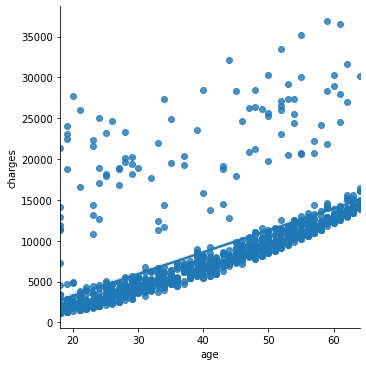

In [24]:
sns.lmplot(x="age", y="charges", data=data[data.smoker=="no"])

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [26]:
checkVIF(X_train_1_f)

,Features,VIF
6,southeast,3.87
7,southwest,3.16
5,northwest,3.07
4,northeast,2.93
1,bmi,1.11
0,age,1.03
2,children,1.01
3,male,1.00


In [27]:
checkVIF(X_train_2_f)

,Features,VIF
6,southeast,4.26
4,northeast,2.76
7,southwest,2.57
5,northwest,2.40
1,bmi,1.15
3,male,1.06
2,children,1.03
0,age,1.02


Model Selection
================

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.metrics import r2_score, mean_squared_error

models = [LinearRegression, Ridge, Lasso, DecisionTreeRegressor, RandomForestRegressor, KNeighborsRegressor, SVR, GaussianProcessRegressor]

In [29]:
def fit(X_train, X_test, y_train, y_test):
    accuracy = {}
    for model in models:
        tmp = model()
        tmp.fit(X_train, y_train)
        pred = tmp.predict(X_test)
        accuracy[str(model())[:-2]] = r2_score(pred,y_test)
    return accuracy

In [30]:
fit(X_train_1_f, X_test_1_f, y_train_1, y_test_1)

{'LinearRegression': 0.6531940526781959,
 'Ridge': 0.6433238581343493,
 'Lasso': -1.7222568678657762e+29,
 'DecisionTreeRegressor': 0.48549746429863094,
 'RandomForestRegressor': 0.6409368077149563,
 'KNeighborsRegressor': 0.473926061634407,
 'SVR': 0.7579494831758247,
 'GaussianProcessRegressor': 0.029321448127941796}

In [31]:
fit(X_train_2_f, X_test_2_f, y_train_2, y_test_2)

{'LinearRegression': 0.6381116953792348,
 'Ridge': 0.5065567450521964,
 'Lasso': -4.487097960997801e+28,
 'DecisionTreeRegressor': 0.7424276398952905,
 'RandomForestRegressor': 0.8674820924628707,
 'KNeighborsRegressor': -0.9712829395745197,
 'SVR': 0.4624556156357059,
 'GaussianProcessRegressor': 0.046022397573466156}

Even though r2 is low it gives more closer values than main A05

SVR for non-smokers and RandomForest for smokers seems good

In [32]:
svr = SVR()
svr.fit(X_train_1_f, y_train_1)
pred1 = svr.predict(X_test_1_f)
print(r2_score(pred1, y_test_1))
print(mean_squared_error(pred1, y_test_1))

0.7579494831758247
0.10578104647815359


In [33]:
rf = RandomForestRegressor()
rf.fit(X_train_2_f, y_train_2)
pred2 = rf.predict(X_test_2_f)
print(r2_score(pred2, y_test_2))
print(mean_squared_error(pred2, y_test_2))

0.8804487607327497
0.013832311931084161


<AxesSubplot:xlabel='charges', ylabel='Density'>

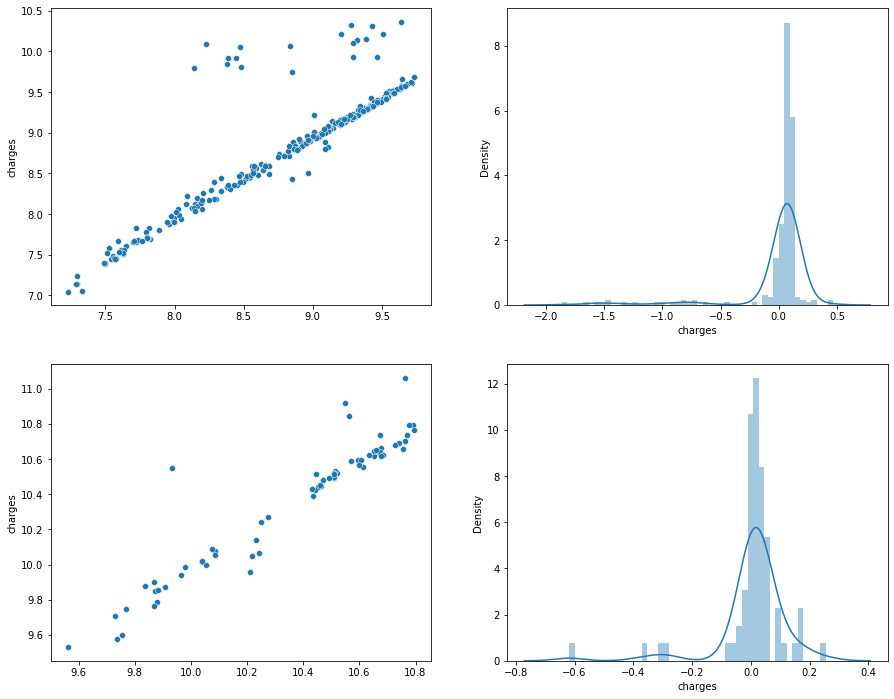

In [34]:
plt.subplots(2,2, figsize=(15,12))
plt.subplot(2,2,1)
sns.scatterplot(x=pred1, y=y_test_1)
plt.subplot(2,2,2)
sns.distplot(pred1-y_test_1)
plt.subplot(2,2,3)
sns.scatterplot(x=pred2, y=y_test_2)
plt.subplot(2,2,4)
sns.distplot(pred2-y_test_2)

scatter between predicted and actual is linear which is what we want and residuals seem to be in normal distribution

In [35]:
import pickle

In [37]:
with open(r"./models/SVR", "wb") as f:
    pickle.dump(svr, f)

In [38]:
with open(r"./models/RandomForest", "wb") as f:
    pickle.dump(rf, f)